In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('C:/Users/JAVA COM/Documents/UAS Data Mining/diabetes.csv')

In [31]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000
mean,3.851900,0.501205,0.566519,20.477064,80.292267,31.986763,0.472477,33.271298,0.348624
std,3.374729,0.197004,0.159010,15.973171,115.457448,7.893221,0.331963,11.772161,0.476847
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,0.354839,0.508197,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,0.470968,0.590164,23.000000,36.000000,32.000000,0.374000,29.000000,0.000000
75%,6.000000,0.625806,0.655738,32.000000,128.500000,36.550000,0.626500,41.000000,1.000000
max,17.000000,1.000000,1.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [32]:
data.shape

(763, 9)

In [33]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [34]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,0.670968,0.590164,35,0,33.6,0.627,50,1
1,1,0.264516,0.540984,29,0,26.6,0.351,31,0
2,8,0.896774,0.524590,0,0,23.3,0.672,32,1
3,1,0.290323,0.540984,23,94,28.1,0.167,21,0
4,0,0.600000,0.327869,35,168,43.1,2.288,33,1


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 763 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               763 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             763 non-null    float64
 3   SkinThickness             763 non-null    int64  
 4   Insulin                   763 non-null    int64  
 5   BMI                       763 non-null    float64
 6   DiabetesPedigreeFunction  763 non-null    float64
 7   Age                       763 non-null    int64  
 8   Outcome                   763 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 59.6 KB


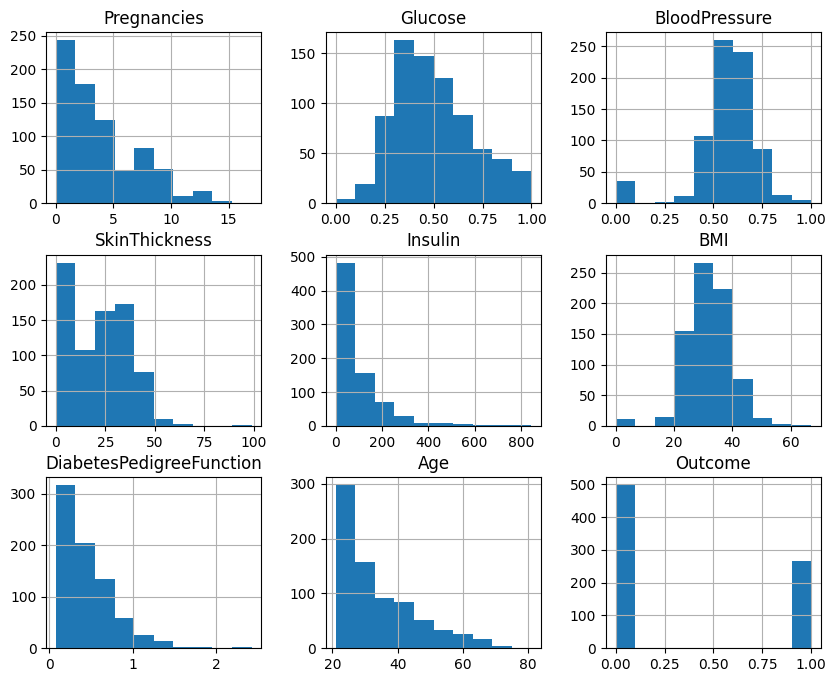

In [36]:
data.hist(figsize=(10, 8))
plt.show()

<Axes: ylabel='Glucose'>

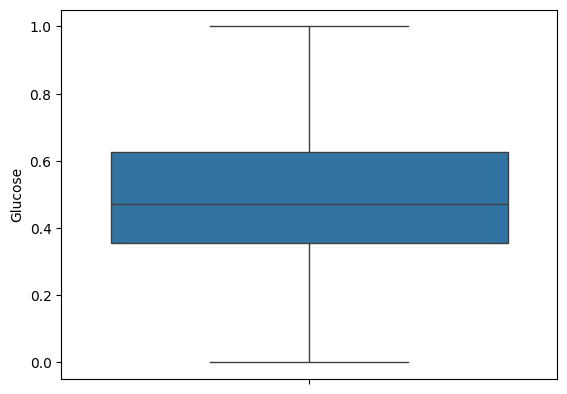

In [37]:
sns.boxplot(data['Glucose'])

In [38]:
Q1 = data['Glucose'].quantile(0.25)
Q3 = data['Glucose'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['Glucose'] >= Q1 - 1.5 * IQR) & (data['Glucose'] <= Q3 + 1.5 * IQR)]

In [39]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[['Glucose', 'BloodPressure']] = scaler.fit_transform(data[['Glucose', 'BloodPressure']])

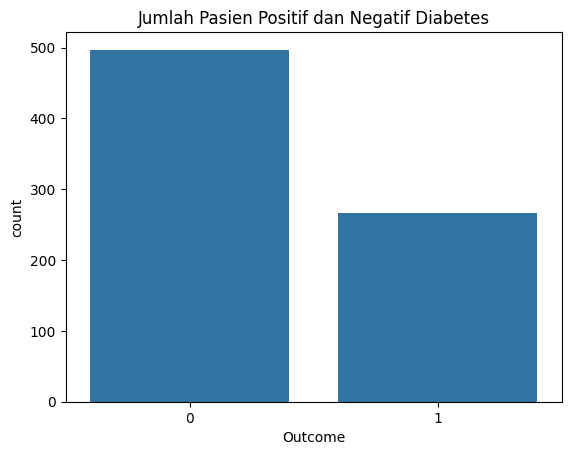

In [40]:
sns.countplot(x='Outcome', data=data)
plt.title('Jumlah Pasien Positif dan Negatif Diabetes')
plt.show()

In [41]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [44]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 0.15681126109346633
R2 Score: 0.27166769624266807


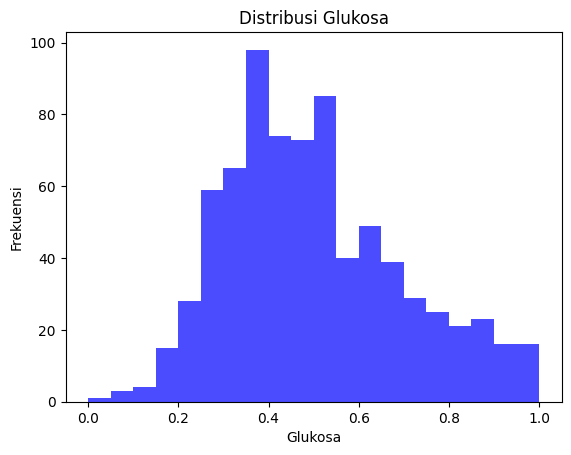

In [47]:
plt.hist(data['Glucose'], bins=20, color='blue', alpha=0.7)
plt.title('Distribusi Glukosa')
plt.xlabel('Glukosa')
plt.ylabel('Frekuensi')
plt.show()

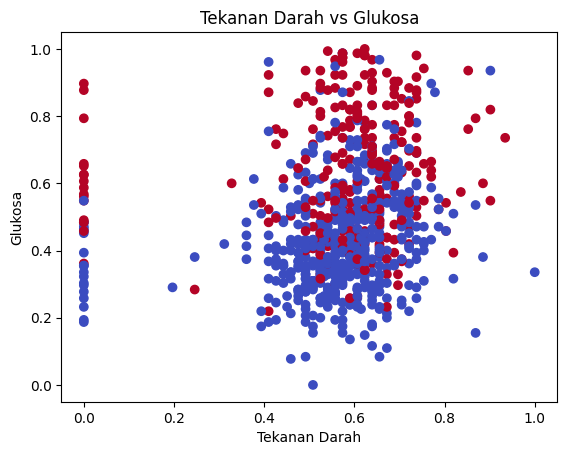

In [16]:
plt.scatter(data['BloodPressure'], data['Glucose'], c=data['Outcome'], cmap='coolwarm')
plt.title('Tekanan Darah vs Glukosa')
plt.xlabel('Tekanan Darah')
plt.ylabel('Glukosa')
plt.show()

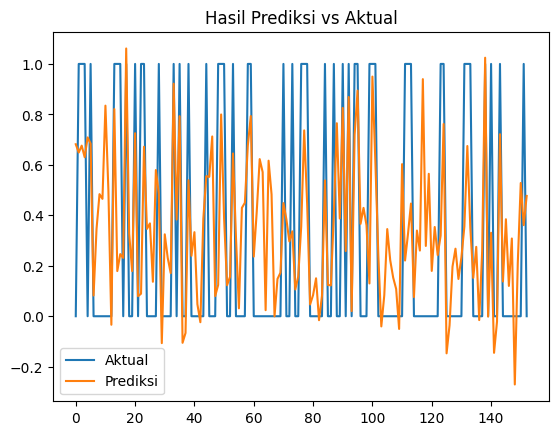

In [17]:
plt.plot(y_test.values, label='Aktual')
plt.plot(y_pred, label='Prediksi')
plt.legend()
plt.title('Hasil Prediksi vs Aktual')
plt.show()

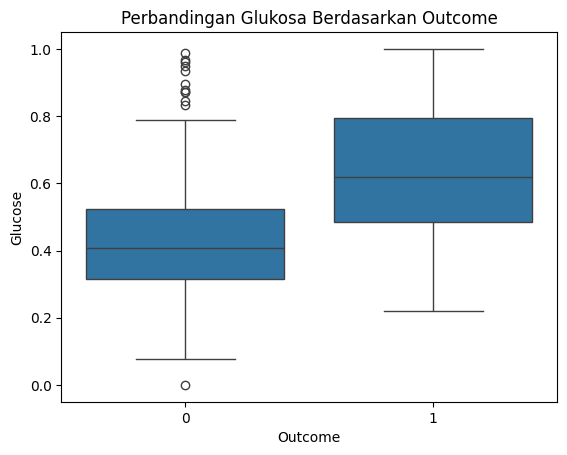

In [18]:
sns.boxplot(x='Outcome', y='Glucose', data=data)
plt.title('Perbandingan Glukosa Berdasarkan Outcome')
plt.show()

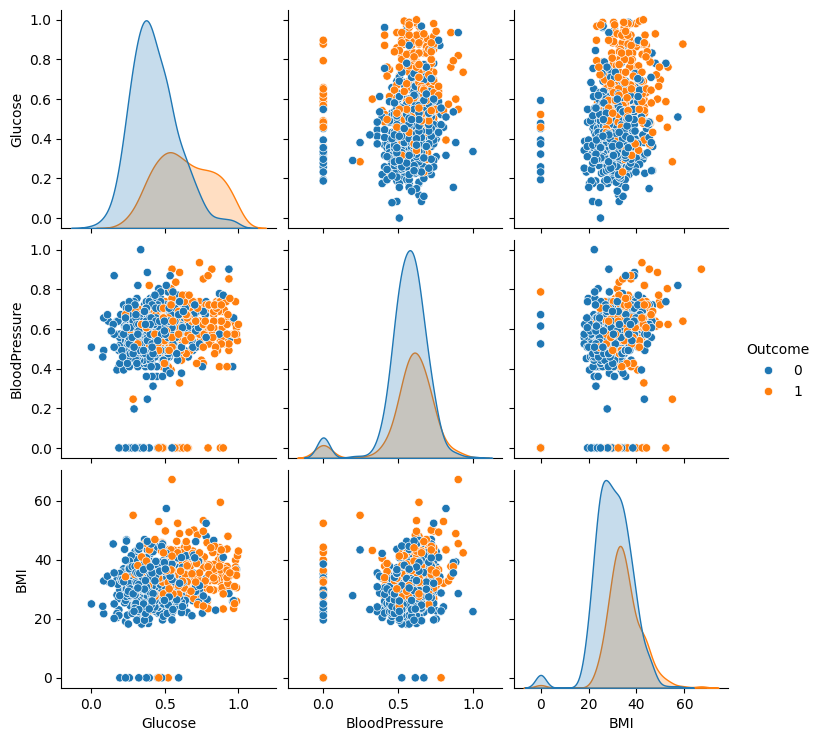

In [19]:
sns.pairplot(data, hue='Outcome', vars=['Glucose', 'BloodPressure', 'BMI'])
plt.show()

In [20]:
coeffs = pd.DataFrame(model.coef_, X.columns, columns=['Koefisien'])
print(coeffs)

                          Koefisien
Pregnancies                0.015728
Glucose                    1.044270
BloodPressure             -0.294818
SkinThickness             -0.000365
Insulin                   -0.000264
BMI                        0.015031
DiabetesPedigreeFunction   0.107032
Age                        0.003288


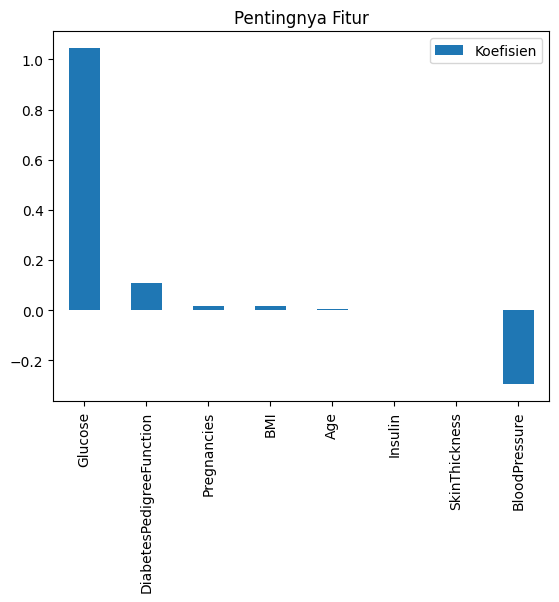

In [21]:
coeffs.sort_values('Koefisien', ascending=False).plot(kind='bar')
plt.title('Pentingnya Fitur')
plt.show()

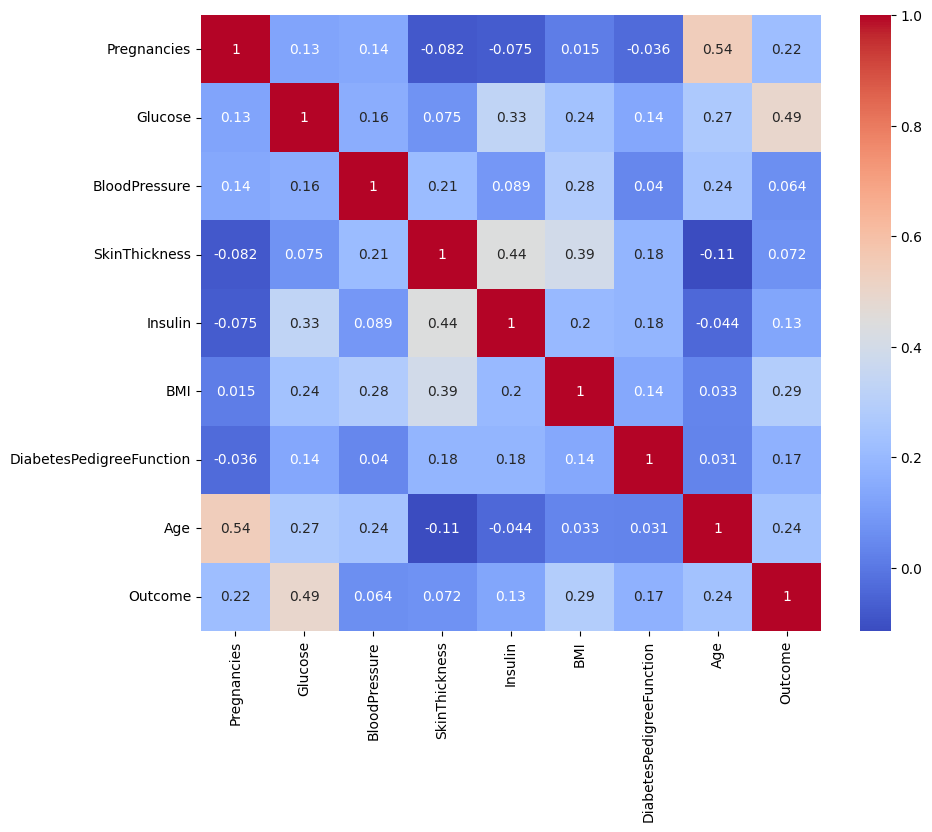

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.show()

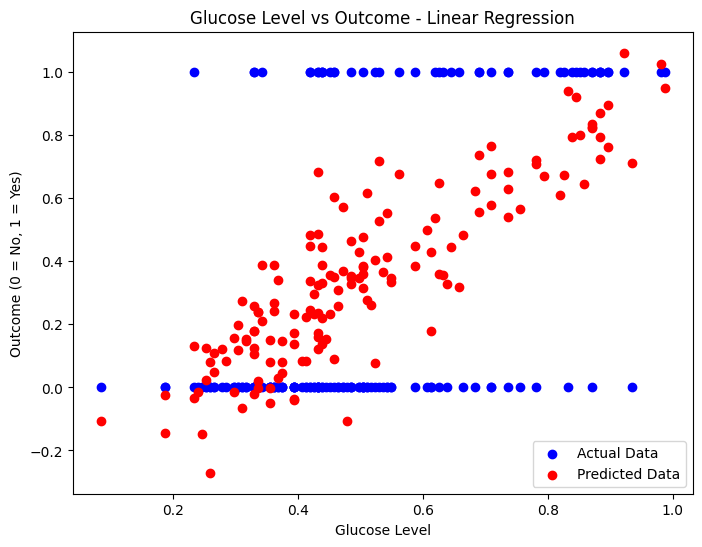

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test['Glucose'], y_test, color='blue', label='Actual Data')
plt.scatter(X_test['Glucose'], y_pred, color='red', label='Predicted Data')
plt.title('Glucose Level vs Outcome - Linear Regression')
plt.xlabel('Glucose Level')
plt.ylabel('Outcome (0 = No, 1 = Yes)')
plt.legend()
plt.show()

In [24]:
positive = data[data['Outcome'] == 1]
negative = data[data['Outcome'] == 0]

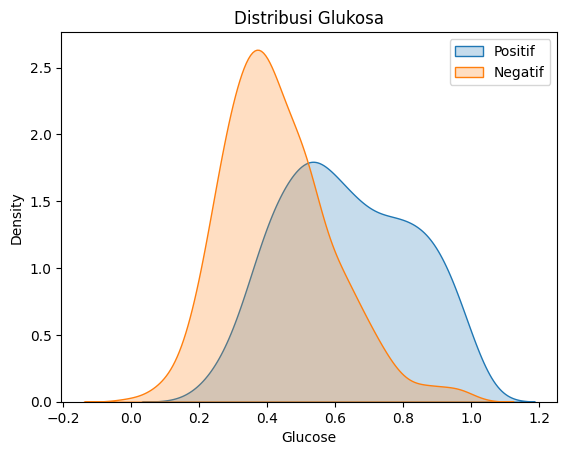

In [25]:
sns.kdeplot(positive['Glucose'], label='Positif', fill=True)
sns.kdeplot(negative['Glucose'], label='Negatif', fill=True)
plt.title('Distribusi Glukosa')
plt.legend()
plt.show()

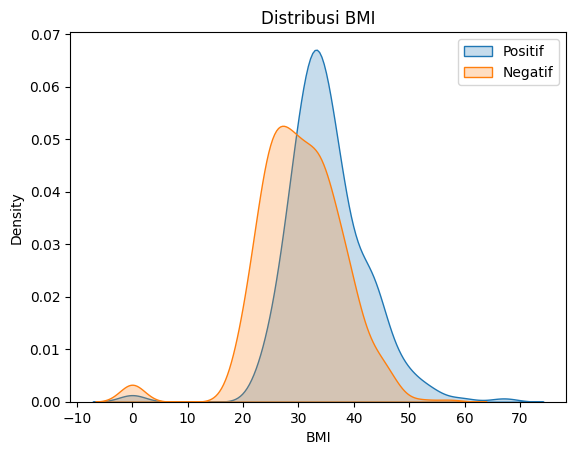

In [26]:
sns.kdeplot(positive['BMI'], label='Positif', fill=True)
sns.kdeplot(negative['BMI'], label='Negatif', fill=True)
plt.title('Distribusi BMI')
plt.legend()
plt.show()

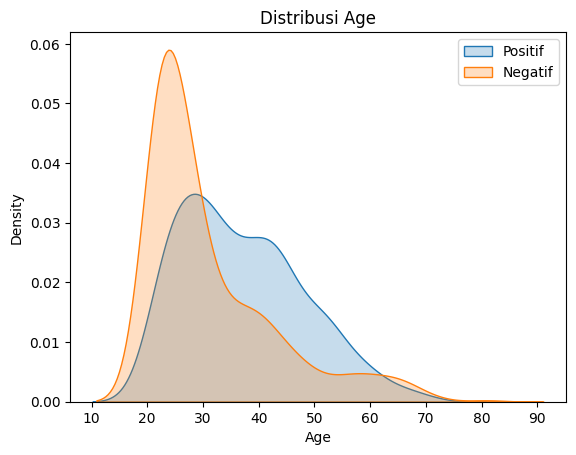

In [27]:
sns.kdeplot(positive['Age'], label='Positif', fill=True)
sns.kdeplot(negative['Age'], label='Negatif', fill=True)
plt.title('Distribusi Age')
plt.legend()
plt.show()

In [28]:
print(f'Koefisien model: {model.coef_}')

Koefisien model: [ 1.57278889e-02  1.04426969e+00 -2.94818127e-01 -3.65171853e-04
 -2.63817578e-04  1.50308276e-02  1.07031507e-01  3.28752119e-03]


In [29]:
print(f'Intercept model: {model.intercept_}')

Intercept model: -0.6729837617733108


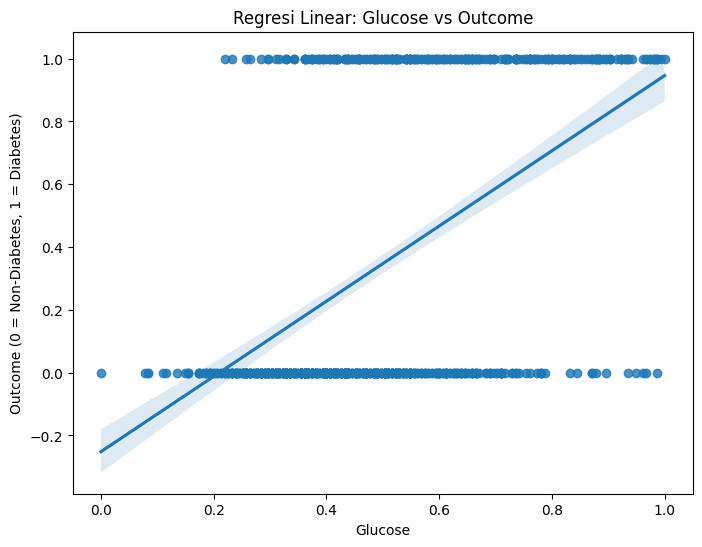

In [30]:
plt.figure(figsize=(8, 6))
sns.regplot(
    x=data["Glucose"], 
    y=data["Outcome"], 
    
)
plt.title("Regresi Linear: Glucose vs Outcome")
plt.xlabel("Glucose")
plt.ylabel("Outcome (0 = Non-Diabetes, 1 = Diabetes)")
plt.show()